# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
time_steps = 60
starting_row = 60
ending_row = 1258
x_train = []
y_train = []
for i in range(starting_row, ending_row):
  x_train.append(training_set_scaled[i - time_steps : i, 0])
  y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping

In [5]:
x_train = np.reshape(x_train, (x_train.shape[0] ,x_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))


### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(x_train, y_train, epochs= 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 108ms/step - loss: 0.0352
Epoch 2/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 7s 195ms/step - loss: 0.0047
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(starting_row, 80):
  x_test.append(inputs[i - time_steps : i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0] ,x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
# reverse the scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

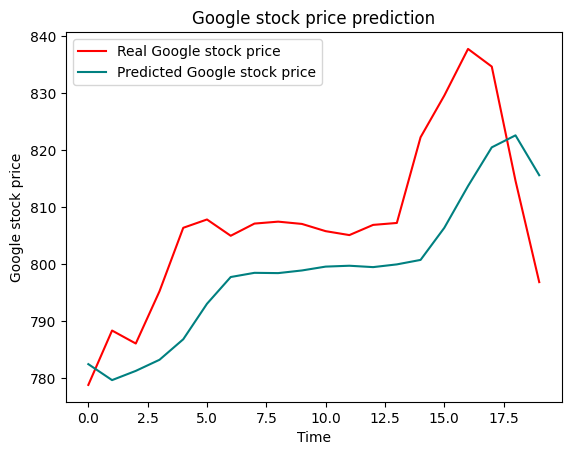

In [25]:
plt.plot(real_stock_price, color="red", label='Real Google stock price')
plt.plot(predicted_stock_price, color="teal", label='Predicted Google stock price')
plt.title("Google stock price prediction")
plt.xlabel("Time")
plt.ylabel("Google stock price")
plt.legend()
plt.show()